In [1]:
import numpy as np
import patsy

np.random.seed(777)

x0 = np.arange(0, 5, step=0.05)
y0 = 1.1 * np.sin(x0) + 4.2 + np.random.randn(x0.shape[0])

y, X = patsy.dmatrices('y0 ~ np.sin(x0)', {'x0': x0, 'y0': y0})

In [2]:
y

DesignMatrix with shape (100, 1)
       y0
  3.73179
  3.43215
  4.24444
  3.65102
  5.32489
  5.23838
  5.35113
  3.25350
  2.87592
  5.68091
  5.27218
  6.67012
  4.05175
  3.46261
  4.27617
  4.39093
  3.75586
  4.58690
  5.97645
  5.35980
  3.74225
  5.83968
  5.63642
  4.74267
  5.31994
  3.70107
  7.73928
  5.73016
  4.97012
  5.31302
  [70 rows omitted]
  Terms:
    'y0' (column 0)
  (to view full data, use np.asarray(this_obj))

In [3]:
X

DesignMatrix with shape (100, 2)
  Intercept  np.sin(x0)
          1     0.00000
          1     0.04998
          1     0.09983
          1     0.14944
          1     0.19867
          1     0.24740
          1     0.29552
          1     0.34290
          1     0.38942
          1     0.43497
          1     0.47943
          1     0.52269
          1     0.56464
          1     0.60519
          1     0.64422
          1     0.68164
          1     0.71736
          1     0.75128
          1     0.78333
          1     0.81342
          1     0.84147
          1     0.86742
          1     0.89121
          1     0.91276
          1     0.93204
          1     0.94898
          1     0.96356
          1     0.97572
          1     0.98545
          1     0.99271
  [70 rows omitted]
  Terms:
    'Intercept' (column 0)
    'np.sin(x0)' (column 1)
  (to view full data, use np.asarray(this_obj))

In [4]:
coef, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

coef

array([[4.20372188],
       [1.12250622]])

In [5]:
x0_ext = np.arange(5, 10, step=0.05)
X_ext, = patsy.build_design_matrices([X.design_info], {'x0': x0_ext})

X_ext

DesignMatrix with shape (100, 2)
  Intercept  np.sin(x0)
          1    -0.95892
          1    -0.94355
          1    -0.92581
          1    -0.90577
          1    -0.88345
          1    -0.85893
          1    -0.83227
          1    -0.80352
          1    -0.77276
          1    -0.74008
          1    -0.70554
          1    -0.66924
          1    -0.63127
          1    -0.59172
          1    -0.55069
          1    -0.50828
          1    -0.46460
          1    -0.41976
          1    -0.37388
          1    -0.32705
          1    -0.27942
          1    -0.23108
          1    -0.18216
          1    -0.13279
          1    -0.08309
          1    -0.03318
          1     0.01681
          1     0.06676
          1     0.11655
          1     0.16604
  [70 rows omitted]
  Terms:
    'Intercept' (column 0)
    'np.sin(x0)' (column 1)
  (to view full data, use np.asarray(this_obj))

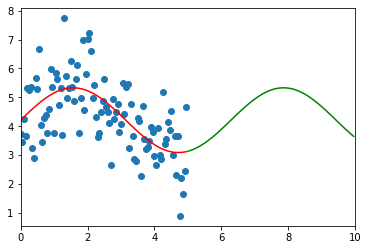

In [6]:
import matplotlib.pyplot as plt

plt.xlim([0, 10])
plt.scatter(x0, y0)
plt.plot(x0, np.dot(X, coef), color='red')
plt.plot(x0_ext, np.dot(X_ext, coef), color='green')
plt.show()

In [7]:
import pandas as pd

np.random.seed(888)

x1 = np.arange(0, 5, step=0.05)
x2 = np.repeat(["a", "b", "c"], 100)
np.random.shuffle(x2)
x2 = x2[:100]

y1 = 1.1 * x1 * 0.3 + \
    np.where(x2 == "a", 1, 0) + \
    np.where(x2 == "b", 3, 0) + \
    np.where(x2 == "c", 7, 0) + \
    np.random.randn(x1.shape[0]) * 0.5

df = pd.DataFrame({"x1": x1, "x2": x2, "y1": y1})

yy, XX = patsy.dmatrices('y1 ~ x1 + x2 + 0', df)

XX

DesignMatrix with shape (100, 4)
  x2[a]  x2[b]  x2[c]    x1
      1      0      0  0.00
      0      0      1  0.05
      0      1      0  0.10
      0      1      0  0.15
      0      0      1  0.20
      1      0      0  0.25
      0      0      1  0.30
      0      1      0  0.35
      0      1      0  0.40
      0      0      1  0.45
      0      1      0  0.50
      1      0      0  0.55
      0      0      1  0.60
      0      0      1  0.65
      0      0      1  0.70
      1      0      0  0.75
      0      0      1  0.80
      1      0      0  0.85
      0      0      1  0.90
      0      0      1  0.95
      1      0      0  1.00
      1      0      0  1.05
      0      1      0  1.10
      0      0      1  1.15
      1      0      0  1.20
      0      1      0  1.25
      0      1      0  1.30
      0      1      0  1.35
      0      1      0  1.40
      0      0      1  1.45
  [70 rows omitted]
  Terms:
    'x2' (columns 0:3)
    'x1' (column 3)
  (to view full data, use n

In [8]:
coef2, _, _, _ = np.linalg.lstsq(XX, yy, rcond=None)

coef2

array([[0.9847538 ],
       [2.80548018],
       [6.91408127],
       [0.3674121 ]])

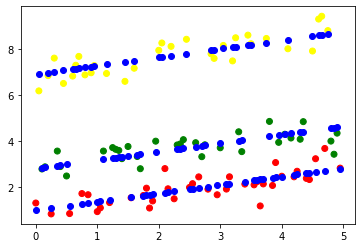

In [9]:
import matplotlib.pyplot as plt

color_map = {'a': 'red', 'b': 'green', 'c': 'yellow'}

plt.scatter(x1, y1, c=[color_map[v] for v in x2])
plt.scatter(x1, np.dot(XX, coef2), color='blue')
plt.show()

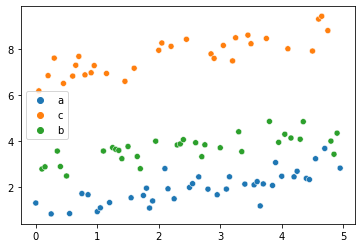

In [10]:
import seaborn as sns

sns.scatterplot(x=x1, y=y1, hue=x2)
plt.show()